<a href="https://colab.research.google.com/github/shfjri/Project_UTS_FGA/blob/main/UTS_Kelompok_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import os
import zipfile

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import jaccard_similarity_score

from matplotlib import pyplot as plt
from matplotlib import image as img

from google.colab import files

In [3]:
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


In [69]:
!kaggle datasets download -d pavlofesenko/titanic-extended

titanic-extended.zip: Skipping, found more recently modified local copy (use --force to force download)


In [70]:
local_zip = 'titanic-extended.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [71]:
os.listdir('/content')

['.config',
 'titanic-countries-full.zip',
 'titanic-extended.zip',
 'kaggle.json',
 'full.csv',
 'test.csv',
 'Titanic_Research_v6.csv',
 'train.csv',
 'sample_data']

In [122]:
titanic = pd.read_csv('train.csv')
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
400,401,1.0,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,NaN,S,1074.0,"Niskanen, Mr. Juha",39.0,"Kivijärvi, Finland",Southampton,"Boston, Massachusetts, US",9,NaN,3.0
219,220,0.0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,NaN,S,437.0,"Harris, Mr. Walter",30.0,"London, England",Southampton,New York City,NaN,NaN,2.0
395,396,0.0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S,896.0,"Johansson, Mr. Erik",22.0,"Frostensmåla, Småland, Sweden",Southampton,"St. Paul, Minnesota, US",NaN,156MB,3.0
22,23,1.0,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,1014.0,"McGowan, Miss Anna F. ""Annie""",16.0,"Massbrook, Mayo, Ireland",Queenstown,"Chicago, Illinois, US",13,NaN,3.0
282,283,0.0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S,769.0,"de Pelsmaeker, Mr. Alfons",16.0,"Heldergem, Haaltert, East Flanders, Belgium",Southampton,"Gladstone, Michigan, US",NaN,NaN,3.0
557,558,0.0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,341,1.0,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S,523.0,"Navratil, Master Edmond Roger",2.0,"Nice, France",Southampton,New York City,D,NaN,2.0
564,565,0.0,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.0500,NaN,S,1020.0,"Meanwell, Mrs. Mary Ann",63.0,"Eastbourne, East Sussex, England",Southampton,New York City,NaN,NaN,3.0
240,241,0.0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,885.0,"Jabbour, Miss Tamini",19.0,"Unknown, Syria",Cherbourg,New York City,NaN,NaN,3.0
268,269,1.0,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S,136.0,"Graham, Mrs. Edith Ware (née Junkins)",59.0,"Greenwich, Connecticut, US",Southampton,"Greenwich, Connecticut, US",3,NaN,1.0


In [123]:
titanic = titanic[['PassengerId', 'Survived','Pclass','Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
506,507,1.0,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,NaN,S
744,745,1.0,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,NaN,S
328,329,1.0,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,NaN,S
600,601,1.0,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
57,58,0.0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
593,594,0.0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q
212,213,0.0,3,"Perkin, Mr. John Henry",male,22.0,0,0,A/5 21174,7.2500,NaN,S
69,70,0.0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
220,221,1.0,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S
876,877,0.0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S


In [124]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


In [125]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [112]:
# survived = titanic.groupby(['Survived','Sex'])['PassengerId'].nunique()
# survived = pd.DataFrame(survived)
# survived

In [113]:
# survived.plot(kind='bar', use_index=True)

In [126]:
survivedSex = titanic[titanic['Survived']==1]['Sex'].value_counts()
diedSex = titanic[titanic['Survived']==0]['Sex'].value_counts()
titanicSurvivedSex = pd.DataFrame([survivedSex, diedSex])
titanicSurvivedSex.index = ['Survived', 'Died']
titanicSurvivedSex

,female,male
Survived,233,109
Died,81,468


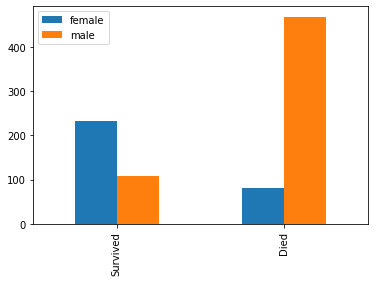

In [127]:
titanicSurvivedSex.plot(kind='bar')

In [128]:
survivedPclass = titanic[titanic['Survived']==1]['Pclass'].value_counts()
diedPclass = titanic[titanic['Survived']==0]['Pclass'].value_counts()

titanicSurvivedPclass = pd.DataFrame([survivedPclass, diedPclass])

titanicSurvivedPclass.index = ['Survived', 'Died']

titanicSurvivedPclass

,1,2,3
Survived,136,87,119
Died,80,97,372


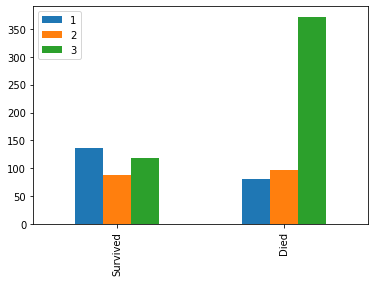

In [129]:
titanicSurvivedPclass.plot(kind='bar')

In [118]:
# age = titanic.groupby(['Survived', 'Pclass'])['PassengerId'].nunique()
# age = pd.DataFrame(age)
# age
# age.plot(kind='bar')

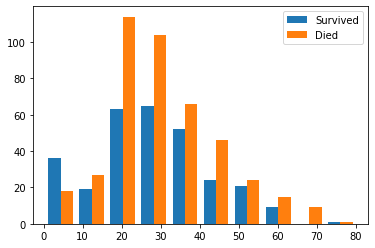

In [130]:
plt.hist([titanic[titanic['Survived']==1]['Age'], titanic[titanic['Survived']==0]['Age']], bins=10)
plt.legend(['Survived', 'Died'])
plt.show()

In [131]:
titanic.Sex[titanic['Sex']=='male']=1
titanic.Sex[titanic['Sex']=='female']=2
titanic.sample(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,409,0.0,3,"Birkeland, Mr. Hans Martin Monsen",1,21.00,0,0,312992,7.7750,NaN,S
769,770,0.0,3,"Gronnestad, Mr. Daniel Danielsen",1,32.00,0,0,8471,8.3625,NaN,S
206,207,0.0,3,"Backstrom, Mr. Karl Alfred",1,32.00,1,0,3101278,15.8500,NaN,S
828,829,1.0,3,"McCormack, Mr. Thomas Joseph",1,NaN,0,0,367228,7.7500,NaN,Q
305,306,1.0,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,S
767,768,0.0,3,"Mangan, Miss. Mary",2,30.50,0,0,364850,7.7500,NaN,Q
432,433,1.0,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",2,42.00,1,0,SC/AH 3085,26.0000,NaN,S
527,528,0.0,1,"Farthing, Mr. John",1,NaN,0,0,PC 17483,221.7792,C95,S
649,650,1.0,3,"Stanley, Miss. Amy Zillah Elsie",2,23.00,0,0,CA. 2314,7.5500,NaN,S
212,213,0.0,3,"Perkin, Mr. John Henry",1,22.00,0,0,A/5 21174,7.2500,NaN,S


In [132]:
titanic.Embarked[titanic['Embarked']=='S'] = 0
titanic.Embarked[titanic['Embarked']=='C'] = 1
titanic.Embarked[titanic['Embarked']=='Q'] = 2
titanic.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0


In [133]:
data = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,0
1,1.0,1,2,38.0,1,0,71.2833,1
2,1.0,3,2,26.0,0,0,7.9250,0
3,1.0,1,2,35.0,1,0,53.1000,0
4,0.0,3,1,35.0,0,0,8.0500,0


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 55.8+ KB


In [136]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [138]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].median())
data.isna().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 55.8+ KB


In [152]:
X = np.asarray(data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']])
X[0:5]

array([[3, 1, 22.0, 1, 0, 7.25, 0.0],
       [1, 2, 38.0, 1, 0, 71.2833, 1.0],
       [3, 2, 26.0, 0, 0, 7.925, 0.0],
       [1, 2, 35.0, 1, 0, 53.1, 0.0],
       [3, 1, 35.0, 0, 0, 8.05, 0.0]], dtype=object)

In [153]:
Y= np.asarray(data['Survived'])
Y[0:5]

array([0., 1., 1., 1., 0.])

In [154]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 7) (712,)
Test set: (179, 7) (179,)


In [159]:
y_test[0:5]

array([0., 0., 1., 1., 0.])

In [178]:
LogR = LogisticRegression(C=0.01, solver='liblinear', max_iter=1000, multi_class='ovr', random_state=4).fit(X_train,y_train)
LogR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=4,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [179]:
yhat = LogR.predict(X_test)
yhat

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0.])

In [180]:
yhatprob = LogR.predict_proba(X_test)
yhatprob[0:5]

array([[0.69516148, 0.30483852],
       [0.69648334, 0.30351666],
       [0.56637996, 0.43362004],
       [0.47428826, 0.52571174],
       [0.69285946, 0.30714054]])

In [181]:
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.770949720670391

In [161]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [162]:
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 25  35]
 [  6 113]]


Confusion matrix, without normalization
[[ 25  35]
 [  6 113]]


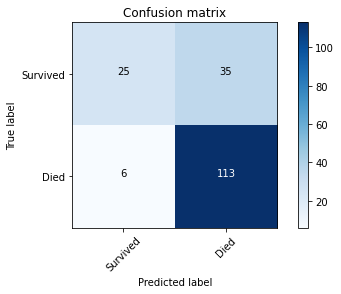

In [163]:
conf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
plot_confusion_matrix(conf_matrix, classes=['Survived', 'Died'])

In [165]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.76      0.95      0.85       119
         1.0       0.81      0.42      0.55        60

    accuracy                           0.77       179
   macro avg       0.78      0.68      0.70       179
weighted avg       0.78      0.77      0.75       179

